## Importing

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

## Reading and Understanding the data 

In [2]:
train=pd.read_csv("C:/Users/Dragneel/Desktop/train.tsv" , delimiter='\t',encoding='utf-8')
test=pd.read_csv("C:/Users/Dragneel/Desktop/test.tsv" , delimiter='\t', encoding='utf-8')
sub=pd.read_csv("C:/Users/Dragneel/Desktop/sampleSubmission.csv")

In [3]:
train.columns

Index(['PhraseId', 'SentenceId', 'Phrase', 'Sentiment'], dtype='object')

In [4]:
train.describe

<bound method NDFrame.describe of         PhraseId  SentenceId  \
0              1           1   
1              2           1   
2              3           1   
3              4           1   
4              5           1   
5              6           1   
6              7           1   
7              8           1   
8              9           1   
9             10           1   
10            11           1   
11            12           1   
12            13           1   
13            14           1   
14            15           1   
15            16           1   
16            17           1   
17            18           1   
18            19           1   
19            20           1   
20            21           1   
21            22           1   
22            23           1   
23            24           1   
24            25           1   
25            26           1   
26            27           1   
27            28           1   
28            29           1   
29    

In [5]:
train.index

RangeIndex(start=0, stop=156060, step=1)

In [6]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


#### So, we can see only thing that matter is Phrase and Sentiment rest is irrelevent

Checking if sentence id is 1 for whole data ?

In [7]:
train.head(100)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


##### well this is kinda complex now 

am i even reading data corrctly (thinking out loud) :P

In [8]:
pd.options.display.max_colwidth

50

In [9]:
pd.options.display.max_colwidth = 200

In [10]:
train.head(1)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1


In [11]:
train.head(2)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2


##### well yup i am reading data correctly XD

### well so sentence id is different for different movie  review (i am noob)
lets see what can we do further.... Let's Analyse and tokenize the phrases

# Data visualisation

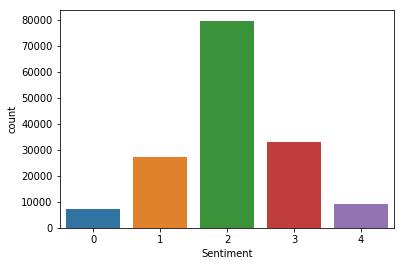

In [12]:
sns.countplot(x='Sentiment', data=train)

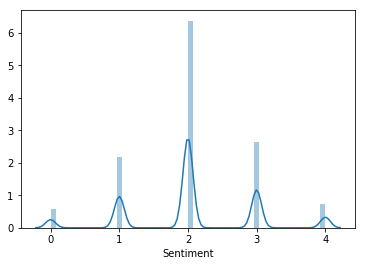

In [13]:
sns.distplot(train['Sentiment'])

In [14]:
train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

##### So most of the times we get neutral sentiment

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [16]:
stopwords = set(STOPWORDS)
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))
    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
            fig.suptitle(title, fontsize=20)
            fig.subplots_adjust(top=2.3)

            plt.imshow(wordcloud)
            plt.show()

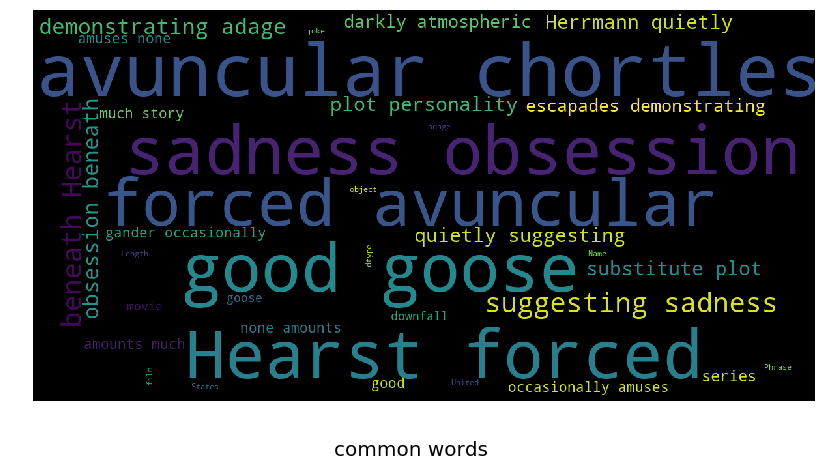

In [17]:
show_wordcloud(train['Phrase'],'common words')

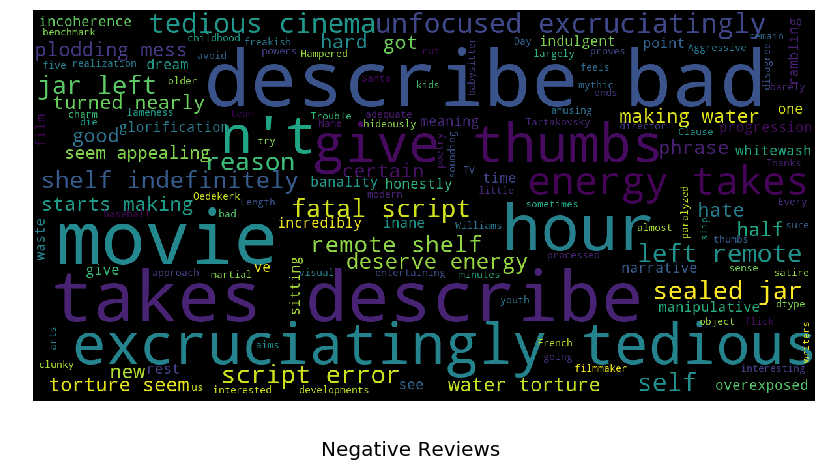

In [18]:
show_wordcloud(train[train['Sentiment'] == 0]['Phrase'],'Negative Reviews')

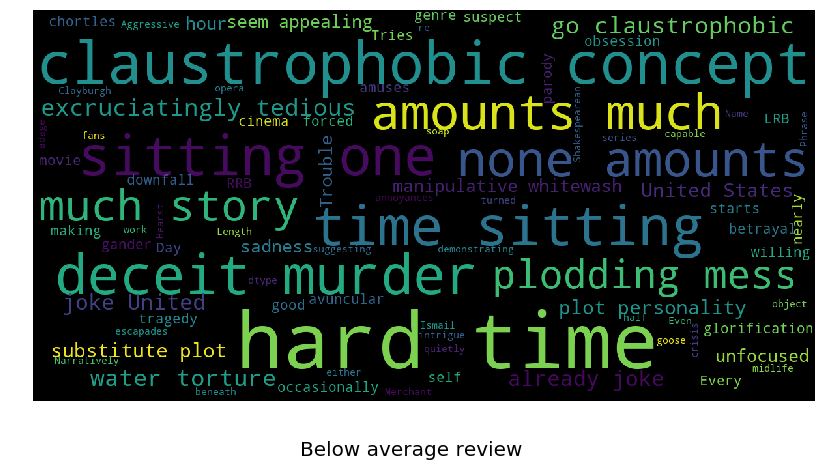

In [19]:
show_wordcloud(train[train['Sentiment']==1]['Phrase'] , 'Below average review')

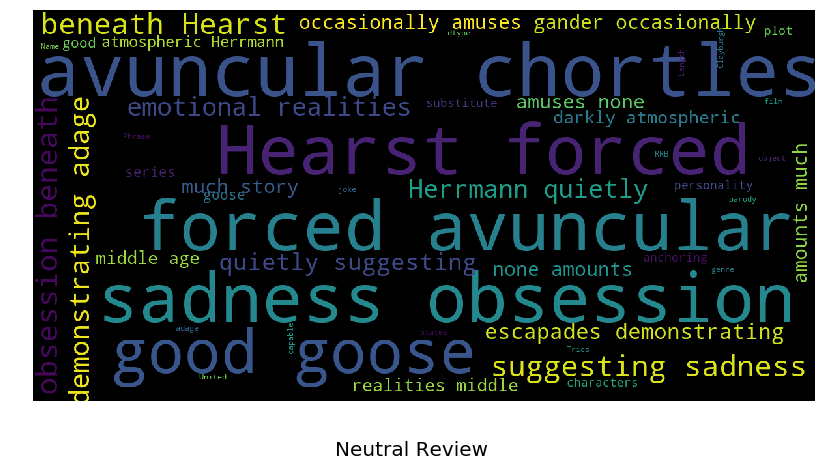

In [20]:
show_wordcloud(train[train['Sentiment']==2]['Phrase'],'Neutral Review')

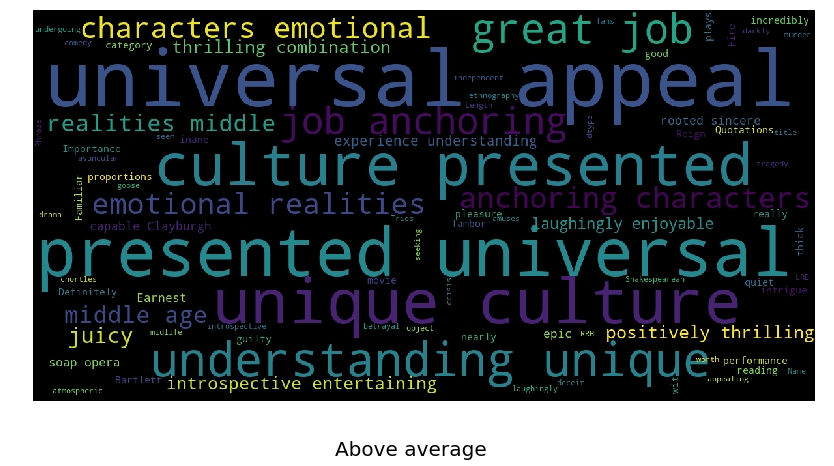

In [21]:
show_wordcloud(train[train['Sentiment']==3]['Phrase'],'Above average')

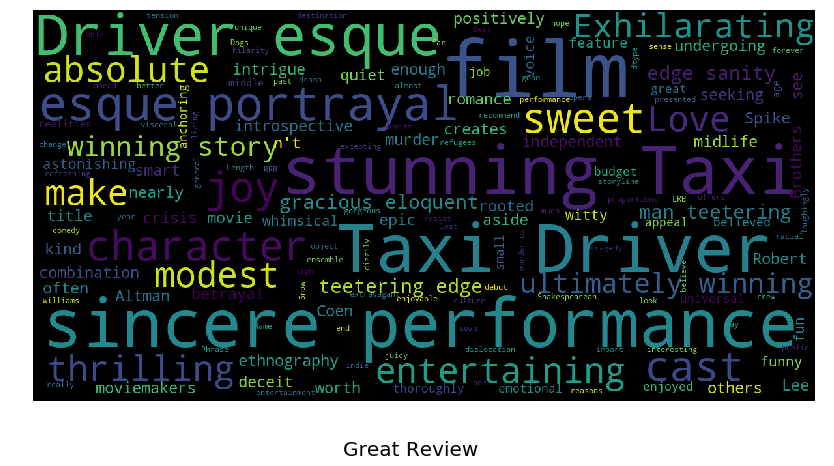

In [22]:
show_wordcloud(train[train['Sentiment']==4]['Phrase'],'Great Review')

##### So we can see :-
most used negative words : Bad ,Tedious 
below average words : Hard time , Deciet
average : Hearst , Obsession
above average : universal , presented , culture
great : Stunning, Sincere

## Data Cleaning and Transformation

In [23]:
import re
import string
def prepare_text(text):
    text = text.lower()
    return text

In [24]:
train['cleaned_phrase'] = ''
train['cleaned_phrase'] = [prepare_text(phrase) for phrase in train.Phrase]
test['cleaned_phrase'] = ''
test['cleaned_phrase'] = [prepare_text(phrase) for phrase in test.Phrase]

In [25]:
print(train['cleaned_phrase'])

0         a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .
1                                                                                                                        a series of escapades demonstrating the adage that what is good for the goose
2                                                                                                                                                                                             a series
3                                                                                                                                                                                                    a
4                                                                                                                                                                                               series
5    

In [26]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment,cleaned_phrase
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1,"a series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story ."
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2,a series of escapades demonstrating the adage that what is good for the goose
2,3,1,A series,2,a series
3,4,1,A,2,a
4,5,1,series,2,series


In [27]:
from nltk.util import ngrams
text = ' '.join(train.loc[train.Sentiment == 4, 'Phrase'].values)
text = [i for i in ngrams(text.split(), 3)]

In [28]:
from collections import Counter
Counter(text).most_common(20)

[(('one', 'of', 'the'), 199),
 (('of', 'the', 'year'), 103),
 (('.', 'is', 'a'), 87),
 (('of', 'the', 'best'), 80),
 (('of', 'the', 'most'), 70),
 (('is', 'one', 'of'), 50),
 (('One', 'of', 'the'), 43),
 ((',', 'and', 'the'), 40),
 (('the', 'year', "'s"), 38),
 (('It', "'s", 'a'), 38),
 (('it', "'s", 'a'), 37),
 (('.', "'s", 'a'), 37),
 (('a', 'movie', 'that'), 35),
 (('the', 'edge', 'of'), 34),
 (('the', 'kind', 'of'), 33),
 (('of', 'your', 'seat'), 33),
 (('the', 'film', 'is'), 31),
 ((',', 'this', 'is'), 31),
 (('the', 'film', "'s"), 31),
 ((',', 'the', 'film'), 30)]

In [29]:
from nltk.tokenize import TweetTokenizer

In [30]:
tokenizer = TweetTokenizer()

## Modelling


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
vectorizer = TfidfVectorizer(ngram_range=(1, 3), tokenizer=tokenizer.tokenize)
full_text = list(train['Phrase'].values) + list(test['Phrase'].values)
vectorizer.fit(full_text)
train_vectorized = vectorizer.transform(train['Phrase'])
test_vectorized = vectorizer.transform(test['Phrase'])

In [33]:
y = train['Sentiment']

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
logreg = LogisticRegression()
ovr = OneVsRestClassifier(logreg)

In [35]:
%%time
ovr.fit(train_vectorized, y)

Wall time: 29.1 s


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None)

In [36]:
from sklearn.model_selection import cross_val_score

In [37]:
scores = cross_val_score(ovr, train_vectorized, y, scoring='accuracy', n_jobs=-1, cv=3)

In [38]:
scores

array([0.55501519, 0.55084583, 0.54948287])

In [39]:
predictions = ovr.predict(test_vectorized)
sub['Sentiment'] = predictions
sub.to_csv("svc.csv", index=False)

In [40]:
sub.head()

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,3
3,156064,2
4,156065,2
